In [1]:
import numpy as np
from classfunctions import NbodyClass
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D

In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplo

### Part 2: Two particles moving in a circle

This part shows two particles in a non-periodic system moving in a circlular orbit around eachother.

Note that circular with two particles implies that motion is going to occur along a single plane, one plane where the particles begin initially seperated, and another plane where there is some initial velocity. In this case it makes the most sense for ease of plotting to seperate the particles in one of the x,y,z axis and add velocity in another of the x,y,z axis. 

In the end, the problem is still solved in 3D, but the plotting can be done in 2D as the only motion occurs in a plane, which for our convenience we define to be the xy axis.

Two iterations are done to additionally show the effects of softening (softening is discussed in part 1).

**Softening = 3** 

Running with a softening of 3 does not noticeably distort the circular orbits, but it is slightly unstable and after less time the particles fly off.

<img src="outputs/circlesoft3.png" width="300" height="400" />

**Softening = 4**

With a softening of 4 you can start to see the orbits are no longer quite circular, as the potential is more distorted. However the particles last longer before flying off as there is less potential for them to suddenly gain a large amount of velocity.

<img src="outputs/circlesoft4.png" width="300" height="400" />

SOFTENING CASE 3
We lost a particle! break


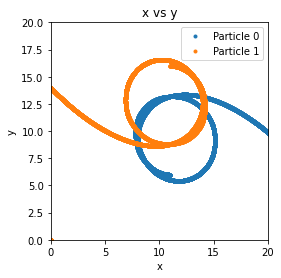

In [2]:
#Two particles moving in a circle. Pick initial conditions such that it's a circle.
print('SOFTENING CASE 3')
num_part = 2
steps = 10**4
spread = 20
soft = 3

pos = np.array([[10, 10],[5, 15], [10, 10]])
vel = np.array([[-0.05, +0.05], [0, 0], [0, 0]])

nbody2 = NbodyClass(pos, vel, dt=0.1, sgrid=spread, periodic=False, gradient=True, soft=3)


data = np.zeros( (3, num_part, steps) )

for ii in range(0, steps):
    nbody2.take_step(DEBUG=False)
    try:
        if nbody2.x.shape[1] < 2:
            print('We lost a particle! break')
            break
        data[:, :, ii] = nbody2.x
    except Exception as e:
        print(str(e))
        print('probably went out of range, stopping at ', ii)
        break
        
mpl.figure()
mpl.plot(data[0, 0, :], data[1, 0, :], '.')
mpl.plot(data[0, 1, :], data[1, 1, :], '.')
mpl.legend(['Particle 0', 'Particle 1'])
mpl.title('x vs y')
mpl.xlabel('x')
mpl.ylabel('y')
mpl.axis('square')
mpl.xlim([0, 20])
mpl.ylim([0, 20])
mpl.show()

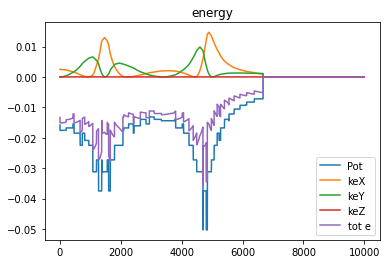

In [3]:
mpl.figure()
mpl.plot(range(0, steps), nbody2.pe[:steps])
mpl.plot(range(0, steps), nbody2.ke[0, :steps])
mpl.plot(range(0, steps), nbody2.ke[1, :steps])
mpl.plot(range(0, steps), nbody2.ke[2, :steps])
mpl.plot(range(0, steps), nbody2.pe[:steps] + np.sum(nbody2.ke, axis=0)[:steps])
mpl.legend(['Pot', 'keX', 'keY', 'keZ', 'tot e'])
mpl.title('energy')
mpl.show()

SOFTENING CASE 4


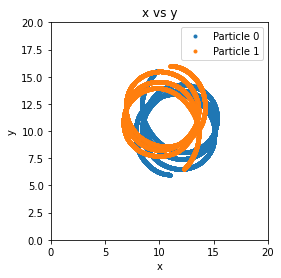

In [4]:
#Two particles moving in a circle. Pick initial conditions such that it's a circle.
print('SOFTENING CASE 4')
num_part = 2
steps = 10**4
spread = 20
soft = 4

pos = np.array([[10, 10],[5, 15], [10, 10]])
vel = np.array([[-0.05, +0.05], [0, 0], [0, 0]])

nbody2 = NbodyClass(pos, vel, dt=0.1, sgrid=spread, periodic=False, gradient=True, soft=4)


data = np.zeros( (3, num_part, steps) )

for ii in range(0, steps):
    nbody2.take_step(DEBUG=False)
    try:
        if nbody2.x.shape[1] < 2:
            print('We lost a particle! break')
            break
        data[:, :, ii] = nbody2.x
    except Exception as e:
        print(str(e))
        print('probably went out of range, stopping at ', ii)
        break
        
mpl.figure()
mpl.plot(data[0, 0, :], data[1, 0, :], '.')
mpl.plot(data[0, 1, :], data[1, 1, :], '.')
mpl.legend(['Particle 0', 'Particle 1'])
mpl.title('x vs y')
mpl.xlabel('x')
mpl.ylabel('y')
mpl.axis('square')
mpl.xlim([0, 20])
mpl.ylim([0, 20])
mpl.show()

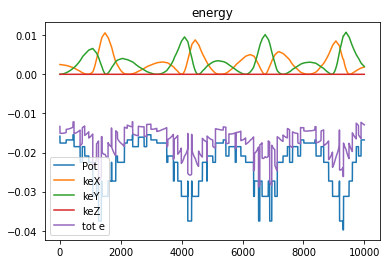

In [5]:
mpl.figure()
mpl.plot(range(0, steps), nbody2.pe[:steps])
mpl.plot(range(0, steps), nbody2.ke[0, :steps])
mpl.plot(range(0, steps), nbody2.ke[1, :steps])
mpl.plot(range(0, steps), nbody2.ke[2, :steps])
mpl.plot(range(0, steps), nbody2.pe[:steps] + np.sum(nbody2.ke, axis=0)[:steps])
mpl.legend(['Pot', 'keX', 'keY', 'keZ', 'tot e'])
mpl.title('energy')
mpl.show()